In [1]:
import time
import os         
import sklearn
import bs4
from bs4 import BeautifulSoup  
import requests
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
%matplotlib inline


In [ ]:
#main url ==> "https://www.goodreads.com/list/show/1.Best_Books_Ever"

    #return an 100-lines array of books url links page 
def get_100_books_to_arr(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"}
    books_links=[]
    r = requests.get(url, headers=headers)
    data = r.text
    books_soup = BeautifulSoup(data)
    for book in books_soup.find_all("tr"):
        new_link="https://www.goodreads.com/"+book.select('tr > td')[2].a["href"]
        books_links.append(new_link)
    return books_links

    # return page of books list url link
def get_next_page_url(page_number):
    main_url = "https://www.goodreads.com/list/show/1.Best_Books_Ever?page="
    new_page_url = main_url + str(page_number)
    return new_page_url
   
def get_Dataframe_of_100_rows(url, books_links):
    
    book_url_page=[]
    
    #rows lists
    rating_num = [] 
    Name = []
    num_page = []     
    Author = []
    User_rating = []
    Reviews = []      
    Year = []
    Language = []
    Genre_1 = []
    Genre_2 = []
    Genre_3 = []
    Publisher = []
     
    for book_page in books_links:
        book_url_page.append(book_page)      
        attemps = 0
        while (attemps <5):
            try:
                headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62"}
                r = requests.get(book_page, headers=headers)
                soup = BeautifulSoup(r.content, "html.parser")
                try:
                    Name.append(soup.find('h1',id="bookTitle").get_text().strip())
                except:
                    Name.append(np.nan)
                try:
                    Author.append(soup.find('a',attrs = {"class":"authorName"}).get_text())
                except:
                    Author.append(np.nan)
                try:
                     num_page.append(soup.find('span',attrs = {"itemprop":"numberOfPages"}).get_text().split("pages")[0].strip())
                except:
                    num_page.append(np.nan)
                try:
                    Language.append(soup.find('div',attrs = {"class":"infoBoxRowItem", "itemprop":"inLanguage"}).get_text())
                except:
                    Language.append(np.nan)
                try:
                    User_rating.append(soup.find('span',attrs = {"itemprop":"ratingValue"}).get_text().strip())
                except:
                    User_rating.append(np.nan)
                try:
                    rating_num.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("ratings")[0][-14:].strip().replace(',',''))
                except:
                    rating_num.append(np.nan)
                try:
                    Reviews.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("reviews")[0][-14:].strip().replace(',',''))
                except:
                    Reviews.append(np.nan)
                try:
                    Genre_1.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[0].get_text())
                except:
                    Genre_1.append(np.nan)
                try:
                    Genre_2.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[1].get_text())
                except:
                    Genre_2.append(np.nan)
                try:
                    Genre_3.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[2].get_text())
                except:
                    Genre_3.append(np.nan)
                try:
                    Year.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[0].split("\n")[2].strip()[-4:])
                except:
                    Year.append(np.nan) 
                try:
                    Publisher.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[1].split("\n")[0].strip())
                except:
                    Publisher.append(np.nan)
                break #Get Out Of 'While' Loop
            except:
                attemps += 1
                
        if (attemps == 5):
            Name.append(np.nan)
            Author.append(book_page)
            num_page.append(np.nan)
            Language.append(np.nan)
            User_rating.append(np.nan)
            rating_num.append(np.nan)
            Reviews.append(np.nan)  
            Genre_1.append(np.nan)
            Genre_2.append(np.nan)
            Genre_3.append(np.nan) 
            Year.append(np.nan)
            Publisher.append(np.nan)
            
    df = pd.DataFrame({'Name':Name,'Author':Author,'num_page':num_page,'Language':Language,'User_rating':User_rating,'rating_num':rating_num,'Reviews':Reviews, 'Genre_1':Genre_1,'Genre_2':Genre_2,'Genre_3':Genre_3,'Year':Year,'Publisher':Publisher,'book_url': book_url_page})
    
    return df

def create_complete_DataFrame(num_of_pages):
    column_names = ["Name", "Author", "num_page","Language","User_rating","rating_num","Reviews","Genre_1","Genre_2","Genre_3","Year","Publisher","book_url"]
    df = pd.DataFrame(columns = column_names)    
    main_url = "https://www.goodreads.com/list/show/1.Best_Books_Ever"
    for index in range(num_of_pages):
        Nth_page_url = get_next_page_url(index+1) #Nth means the '1st', '2nd', '3rd','4th','5th' ... page
        books_links_per_page_list = get_100_books_to_arr(Nth_page_url)
        new_df = get_Dataframe_of_100_rows(Nth_page_url,books_links_per_page_list)
        df = pd.concat([df, new_df],ignore_index=True)
    return df    
        
        


                            Warning! 
Becarefull to use next cell ! it may take a very long time to finish proccessing

In [ ]:
#Becareful to use this function
df=create_complete_DataFrame(1)
#df.to_csv("Night_processing.csv")
df.to_csv("Dummy_True_Daniel_3.csv")


Next Cell is to combine 2 or more dataframes with missing values to create one whole dataframe without missing values at all

In [ ]:
#index_list = list(range(100))
df_dummy1 = pd.read_csv("Dummy_True1.csv")
df_dummy2 = pd.read_csv("Dummy_True2.csv")
df_dummy2 = pd.read_csv("Dummy_True_Daniel_1.csv")
df_complete = df_dummy1.combine_first(df_dummy2)
df_complete = df_complete.combine_first(Dummy_True_Daniel_1.csv)
# df_complete = df_complete.dropna(axis=0)
# df_complete = df_complete.drop_duplicates()
#df_complete.info() #
#df_complete.to_csv("Drop_d.csv") #Optional
#pd.set_option('display.max_rows', None) #To print all rows
#df_complete

In [4]:
df3 = pd.read_csv("complete.csv")

# df4 = pd.read_csv("endis.csv")
df_last = pd.read_csv("endis.csv")


In [144]:
#####missing URL#########
def get_miss_url(df3):
    miss_url = []
    for index,row in df3.iterrows():
        if(pd.isnull(row['Name'])):
             miss_url.append(df3.iloc[index]["book_url"])  
    return miss_url

['https://www.goodreads.com//book/show/10799.A_Farewell_to_Arms',
 'https://www.goodreads.com//book/show/3008.A_Little_Princess',
 'https://www.goodreads.com//book/show/6088007-neuromancer',
 'https://www.goodreads.com//book/show/3462.The_Rescue',
 'https://www.goodreads.com//book/show/394469.Suttree',
 'https://www.goodreads.com//book/show/7670.The_Andromeda_Strain',
 'https://www.goodreads.com//book/show/275000.Fire_and_Ice',
 'https://www.goodreads.com//book/show/146746.The_Jewel_in_the_Crown',
 'https://www.goodreads.com//book/show/10128428-wonderstruck',
 'https://www.goodreads.com//book/show/39863515-an-anonymous-girl',
 'https://www.goodreads.com//book/show/20569957-interview-with-a-master',
 'https://www.goodreads.com//book/show/144791.Seven_Deadly_Wonders',
 'https://www.goodreads.com//book/show/19155234-the-cellar',
 'https://www.goodreads.com//book/show/259655.The_Encyclopedia_of_the_Dead']

In [ ]:
def df_last_with_missing_url(miss_url):
## Search on missing URL. iterate untill getting no missing values  13 TOTAL
    book_url_page=[]

    #rows lists
    rating_num = [] 
    Name = []
    num_page = []     
    Author = []
    User_rating = []
    Reviews = []      
    Year = []
    Language = []
    Genre_1 = []
    Genre_2 = []
    Genre_3 = []
    Publisher = []

    for book_page in miss_url:
        book_url_page.append(book_page)      

        headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62"}
        r = requests.get(book_page, headers=headers)
        soup = BeautifulSoup(r.content, "html.parser")

        try:
            Name.append(soup.find('h1',id="bookTitle").get_text().strip())
        except:
            Name.append(np.nan)
        try:
            Author.append(soup.find('a',attrs = {"class":"authorName"}).get_text())
        except:
            Author.append(np.nan)
        try:
             num_page.append(soup.find('span',attrs = {"itemprop":"numberOfPages"}).get_text().split("pages")[0].strip())
        except:
            num_page.append(np.nan)
        try:
            Language.append(soup.find('div',attrs = {"class":"infoBoxRowItem", "itemprop":"inLanguage"}).get_text())
        except:
            Language.append(np.nan)
        try:
            User_rating.append(soup.find('span',attrs = {"itemprop":"ratingValue"}).get_text().strip())
        except:
            User_rating.append(np.nan)
        try:
            rating_num.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("ratings")[0][-12:].strip().replace(',',''))
        except:
            rating_num.append(np.nan)
        try:
            Reviews.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("reviews")[0][-12:].strip().replace(',',''))
        except:
            Reviews.append(np.nan)
        try:
            Genre_1.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[0].get_text())
        except:
            Genre_1.append(np.nan)
        try:
            Genre_2.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[1].get_text())
        except:
            Genre_2.append(np.nan)
        try:
            Genre_3.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[2].get_text())
        except:
            Genre_3.append(np.nan)
        try:
            Year.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[0].split("\n")[2].strip()[-4:])
        except:
            Year.append(np.nan) 
        try:
            Publisher.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[1].split("\n")[0].strip())
        except:
            Publisher.append(np.nan)
    df_last = pd.DataFrame({'Name':Name,'Author':Author,'num_page':num_page,'Language':Language,'User_rating':User_rating,'rating_num':rating_num,'Reviews':Reviews, 'Genre_1':Genre_1,'Genre_2':Genre_2,'Genre_3':Genre_3,'Year':Year,'Publisher':Publisher,'book_url': book_url_page})  
    return df_last

In [ ]:
df_last = pd.DataFrame({'Name':Name,'Author':Author,'num_page':num_page,'Language':Language,'User_rating':User_rating,'rating_num':rating_num,'Reviews':Reviews, 'Genre_1':Genre_1,'Genre_2':Genre_2,'Genre_3':Genre_3,'Year':Year,'Publisher':Publisher,'book_url': book_url_page})

In [6]:
def combine_and_clean(df_last,df3):
    frames = [df_last, df3]
    result = pd.concat(frames)
    result['Language'].fillna(result['Language'].mode()[0], inplace=True)
    result['Publisher'].fillna(result['Publisher'].mode()[0], inplace=True)
    result['Genre_1'].fillna(result['Genre_1'].mode()[0], inplace=True)
    result['Genre_2'].fillna(result['Genre_1'].mode()[0], inplace=True)
    result['Genre_3'].fillna(result['Genre_1'].mode()[0], inplace=True)
    result['Reviews'].fillna(result['Reviews'].median(), inplace=True)
    result['num_page'].fillna(result['num_page'].median(), inplace=True)
    result['Year'].fillna(result['Year'].median(), inplace=True)
    #delete nan rows
    for index,row in result.iterrows():
        if(pd.isnull(row['Name'])):
            result.drop([index],axis = 0,inplace = True)
    #deleteing unneeded columns
    result.drop(labels = ["Unnamed: 0","Unnamed: 0.1","book_url"],axis = 1, inplace = True) 
    result.to_csv("End1.csv")
    return result
    

In [7]:
## for deleting rows but maybe didnt use
# for index,row in result.iterrows():
#     if(pd.isnull(row['Name'])):
#          result.drop(labels = [],axis = 1,inplace = True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7014 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7014 non-null   int64  
 1   Name          7000 non-null   object 
 2   Author        7000 non-null   object 
 3   num_page      6985 non-null   float64
 4   Language      6963 non-null   object 
 5   User_rating   7000 non-null   float64
 6   rating_num    7000 non-null   float64
 7   Reviews       6999 non-null   float64
 8   Genre_1       6996 non-null   object 
 9   Genre_2       6991 non-null   object 
 10  Genre_3       6985 non-null   object 
 11  Year          6991 non-null   float64
 12  Publisher     6958 non-null   object 
 13  book_url      7014 non-null   object 
 14  Unnamed: 0.1  7000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 876.8+ KB


In [8]:
#result had little cleaning and saved has maybe1
#result2 = pd.read_csv("maybe1.csv")
result['Language'].fillna(result['Language'].mode()[0], inplace=True)
result['Publisher'].fillna(result['Publisher'].mode()[0], inplace=True)
result['Genre_1'].fillna(result['Genre_1'].mode()[0], inplace=True)
result['Genre_2'].fillna(result['Genre_1'].mode()[0], inplace=True)
result['Genre_3'].fillna(result['Genre_1'].mode()[0], inplace=True)
result['Reviews'].fillna(result['Reviews'].median(), inplace=True)
result['num_page'].fillna(result['num_page'].median(), inplace=True)
result['Year'].fillna(result['Year'].median(), inplace=True)
#fill all the missing cells
result.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7014 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7014 non-null   int64  
 1   Name          7000 non-null   object 
 2   Author        7000 non-null   object 
 3   num_page      7014 non-null   float64
 4   Language      7014 non-null   object 
 5   User_rating   7000 non-null   float64
 6   rating_num    7000 non-null   float64
 7   Reviews       7014 non-null   float64
 8   Genre_1       7014 non-null   object 
 9   Genre_2       7014 non-null   object 
 10  Genre_3       7014 non-null   object 
 11  Year          7014 non-null   float64
 12  Publisher     7014 non-null   object 
 13  book_url      7014 non-null   object 
 14  Unnamed: 0.1  7000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 876.8+ KB


In [9]:
#delete nan rows
for index,row in result.iterrows():
    if(pd.isnull(row['Name'])):
        result.drop([index],axis = 0,inplace = True)
#deleteing unneeded columns
result.drop(labels = ["Unnamed: 0","Unnamed: 0.1","book_url"],axis = 1, inplace = True)        

In [11]:
result.to_csv("End1.csv") #NOW I GUESS ITS PERFECT#

In [260]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         7000 non-null   object 
 1   Author       7000 non-null   object 
 2   num_page     7000 non-null   float64
 3   Language     7000 non-null   object 
 4   User_rating  7000 non-null   float64
 5   rating_num   7000 non-null   float64
 6   Reviews      7000 non-null   float64
 7   Genre_1      7000 non-null   object 
 8   Genre_2      7000 non-null   object 
 9   Genre_3      7000 non-null   object 
 10  Year         7000 non-null   float64
 11  Publisher    7000 non-null   object 
dtypes: float64(5), object(7)
memory usage: 969.0+ KB


/Users/danielsh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

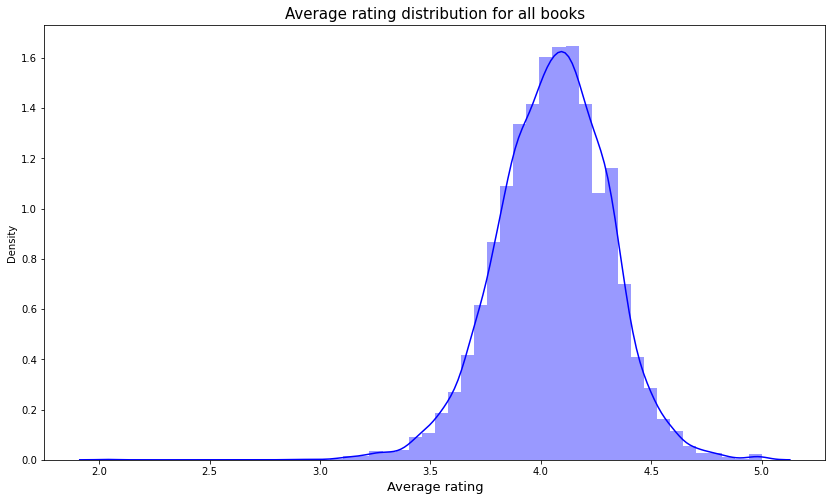

In [5]:
dist = df
dist.User_rating = dist.User_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['User_rating'],ax=ax,color = 'blue' )
ax.set_title('Average rating distribution for all books',fontsize=15)
ax.set_xlabel('Average rating',fontsize=13)

In [6]:
dist = df[~(df['num_page']>1000)]

/Users/danielsh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/danielsh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Page Average ')

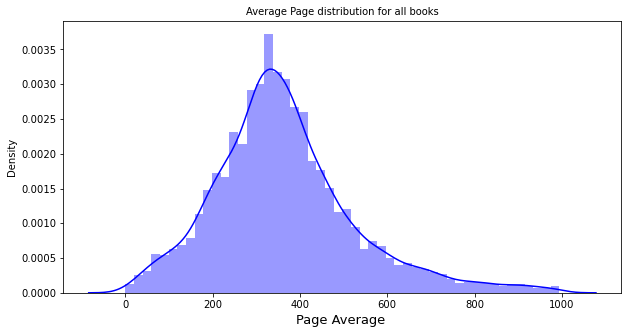

In [7]:
dist.num_page = dist.num_page.astype(float)
fig, ax = plt.subplots(figsize=[10,5])
sns.distplot(dist['num_page'],ax=ax,color = 'blue' )
ax.set_title('Average Page distribution for all books',fontsize=10)
ax.set_xlabel('Page Average ',fontsize=13)

<Figure size 1080x720 with 0 Axes>

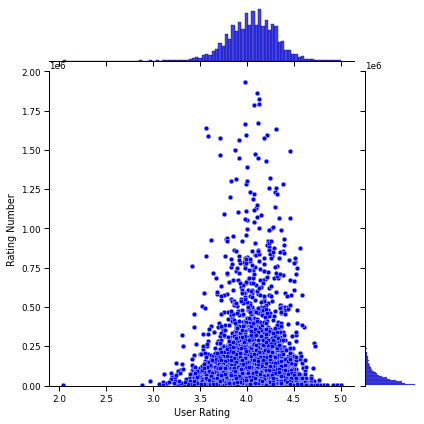

In [23]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="User_rating",y='rating_num', kind='scatter',  data= df, color = 'blue',ylim = (0,2000000))
ax.set_axis_labels("User Rating", "Rating Number")
plt.show()

<Figure size 1080x720 with 0 Axes>

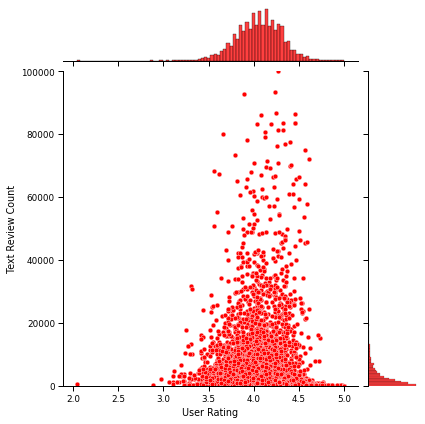

In [22]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="User_rating",y='Reviews', kind='scatter',  data= df, color = 'red',ylim = (0,100000))
ax.set_axis_labels("User Rating", "Text Review Count")
plt.show()

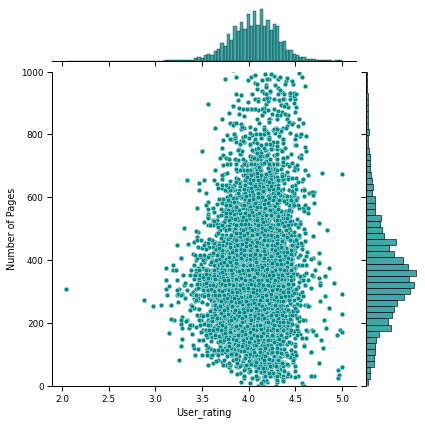

In [21]:

ax = sns.jointplot(x="User_rating", y="num_page", data = df, color = 'darkcyan',ylim = (0,1000))
ax.set_axis_labels("User_rating", "Number of Pages")

/Users/danielsh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre_1'>

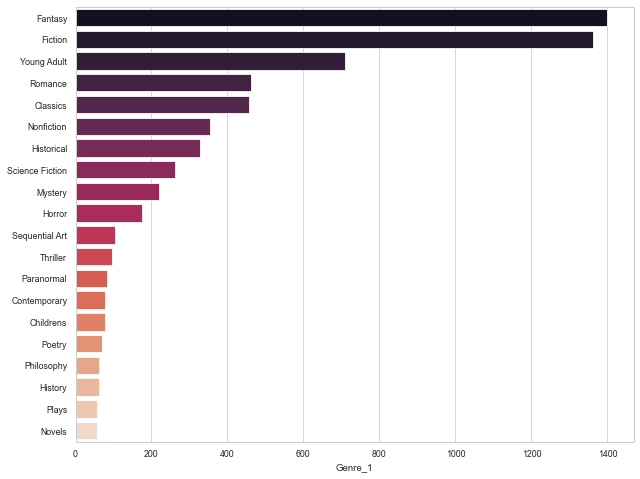

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(df.Genre_1.value_counts().head(20),df.Genre_1.value_counts().head(20).index,palette = 'rocket')